# Setting Up

In [1]:
# Importing libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading excel dataset into a dataframe
store_data = pd.read_excel("Downloads\Sample - Superstore.xlsx", parse_dates=True, index_col="Row ID")
store_data

C:\Users\ASAD\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [3]:
# Ensuring floats do not appear in scientific notation
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Data Cleaning and Value Checks

In [4]:
# Brief info on each column
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9994 non-null   object        
 1   Order Date      9994 non-null   datetime64[ns]
 2   Ship Date       9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Segment         9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Product ID      9994 non-null   object        
 13  Category        9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Prod

In [5]:
# Quick statistical description of numerical columns
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9983.00,9994.00,9994.00,9994.00,9994.00
mean,55245.23,229.86,3.79,0.16,28.66
std,32038.72,623.25,2.23,0.21,234.26
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.28,2.00,0.00,1.73
50%,57103.00,54.49,3.00,0.20,8.67
75%,90008.00,209.94,5.00,0.20,29.36
max,99301.00,22638.48,14.00,0.80,8399.98


In [6]:
# Number of rows and columns
store_data.shape

(9994, 20)

In [7]:
# Checking for duplicates
store_data[store_data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2017-150119,2017-04-23,2017-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.00,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.37,2,0.30,-12.06


In [8]:
# Dropping duplicates
store_data.drop_duplicates(inplace=True)

In [9]:
# Confirming that duplicated row(s) was dropped
store_data[store_data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,


In [10]:
# Checking for nulls
store_data.isna().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [11]:
# Checking the state of the nulls to validate if rows are important
store_data[store_data["Postal Code"].isna() == True]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.00,67.66
5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.00,178.80
8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.00,336.63
9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.00,42.99
9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.00,2.73
9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.00,406.72
9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.00,37.56
9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.00,5.77
9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.00,152.02


In [12]:
# Renaming column names to lowercase for ease of querying
store_data.rename(columns = {
    "Order ID": "order_id",
    "Order Date": "order_date",
    "Ship Date": "ship_date",
    "Ship Mode": "ship_mode",
    "Customer ID": "customer_id",
    "Customer Name": "customer_name",
    "Segment": "segment",
    "Country/Region": "country",
    "City": "city",
    "State": "state",
    "Postal Code": "postal_code",
    "Region": "region",
    "Product ID": "product_id",
    "Category": "category",
    "Sub-Category": "sub_category",
    "Product Name": "product_name",
    "Sales": "sales",
    "Quantity": "quantity",
    "Discount": "discount",
    "Profit": "profit"
}, inplace=True)

# Confirming changes were made
store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


# Exploratory Data Analysis

## Sales Overview: What is the total sales revenue generated by the Superstore?

In [13]:
store_data["sales"].sum()

2296919.4883000003

## Sales Overview: Comparing the median and mean sales amounts per transaction.

In [14]:
store_data["sales"].mean()

229.85284582207098

In [15]:
store_data["sales"].median()

54.48

## Profit Analysis: What is the overall profit earned by the Superstore?

In [16]:
store_data["profit"].sum()

286409.0805

## What are the top three transactions with the highest profits?

In [17]:
store_data.sort_values(by='profit', ascending=False).head(3)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
Row ID,,,,,,,,,,,,,,,,,,,,
6827,CA-2019-118689,2019-10-02,2019-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.00,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.00,8399.98
8154,CA-2020-140151,2020-03-23,2020-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.00,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.00,6719.98
4191,CA-2020-166709,2020-11-17,2020-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.00,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.00,5039.99


## Product Categorization: What are the unique product categories are present in the Superstore dataset?

In [18]:
store_data["category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## What are the total sales & profits for each category of products?

In [19]:
store_data.groupby("category")[["sales", "profit"]].sum().sort_values(by='sales', ascending=False)

,sales,profit
category,,
Technology,836154.03,145454.95
Furniture,741718.42,18463.33
Office Supplies,719047.03,122490.80


## What are the average sales and profits for each category?

In [20]:
store_data.groupby("category")[["sales", "profit"]].mean().sort_values(by='sales', ascending=False)

,sales,profit
category,,
Technology,452.71,78.75
Furniture,349.87,8.71
Office Supplies,119.32,20.33


## Sub-Category Profits: What are the unique sub-categories of products in the Superstore dataset?

In [21]:
store_data["sub_category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## What are the total sales & profits for each sub-category of products?

In [22]:
store_data.groupby("sub_category")[["sales","profit"]].sum().sort_values(by='sales', ascending=False)

,sales,profit
sub_category,,
Phones,330007.05,44515.73
Chairs,328167.73,26602.23
Storage,223843.61,21278.83
Tables,206965.53,-17725.48
Binders,203412.73,30221.76
Machines,189238.63,3384.76
Accessories,167380.32,41936.64
Copiers,149528.03,55617.82
Bookcases,114880.00,-3472.56


## What are the average profits and sales for each sub-category.

In [23]:
store_data.groupby("sub_category")[["sales","profit"]].mean().sort_values(by='sales', ascending=False)

,sales,profit
sub_category,,
Copiers,2198.94,817.91
Machines,1645.55,29.43
Tables,648.79,-55.57
Chairs,532.74,43.19
Bookcases,503.86,-15.23
Phones,371.21,50.07
Storage,264.59,25.15
Supplies,245.65,-6.26
Appliances,230.76,38.92


## Customer Engagement: What is the total number of unique customers in the Superstore dataset?

In [24]:
store_data["customer_id"].nunique()

793

## What are the top five customers based on the number of transactions.

In [25]:
store_data.groupby('customer_name')['order_id'].nunique().sort_values(ascending=False).to_frame().head(5)

,order_id
customer_name,
Emily Phan,17
Sally Hughsby,13
Erin Ashbrook,13
Patrick Gardner,13
Zuschuss Carroll,13


## Order Timeframe: What are the earliest and latest order dates in the dataset.

In [26]:
store_data[store_data["order_date"] == store_data["order_date"].min()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
Row ID,,,,,,,,,,,,,,,,,,,,
7981,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.00,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.20,5.55


In [27]:
store_data[store_data["order_date"] == store_data["order_date"].max()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
Row ID,,,,,,,,,,,,,,,,,,,,
646,CA-2020-126221,2020-12-30,2021-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.00,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.30,2,0.00,56.51
907,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.00,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.14,4,0.20,12.12
908,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.00,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73
909,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.00,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,0.20,19.79
1297,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.00,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52
1298,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.00,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.72,2,0.20,6.47
5092,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.00,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,0.20,-0.60


## Regional Sales Distribution: What are all the unique regions represented in the dataset.

In [28]:
store_data["region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

## What are the total sales and profits for each region.

In [29]:
store_data.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales',ascending=False)

,sales,profit
region,,
West,725457.82,108418.45
East,678499.87,91534.84
Central,501239.89,39706.36
South,391721.91,46749.43


## Discount Impact: What are the average sales amounts for transactions with a discount and without a discount separately.

In [30]:
store_data.query('discount == 0')['sales'].mean()

226.74207378074013

In [31]:
store_data.query('discount > 0')['sales'].mean()

232.7258938017315

In [32]:
# Adding a discount applied column which coluld be used for potential analysis
def apply_discount(row):
    if row["discount"] == 0:
        return "No"
    else:
        return "Yes"
    
store_data["discounted"] = store_data.apply(apply_discount, axis='columns')

store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,discounted
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,No
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,No
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,No
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,Yes
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,Yes


## Product Quantity Insights: What is the total quantity of products sold by the Superstore?

In [33]:
store_data["quantity"].sum()

37871

## Adding a shipping duration for further analysis

In [34]:
# Calculating shipping duration
store_data["wait_time"] = store_data["ship_date"] - store_data["order_date"]

store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,discounted,wait_time
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,No,3 days
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,No,3 days
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,No,4 days
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,Yes,7 days
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,Yes,7 days


In [35]:
# Checking the datatype of the new column
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   order_id       9993 non-null   object         
 1   order_date     9993 non-null   datetime64[ns] 
 2   ship_date      9993 non-null   datetime64[ns] 
 3   ship_mode      9993 non-null   object         
 4   customer_id    9993 non-null   object         
 5   customer_name  9993 non-null   object         
 6   segment        9993 non-null   object         
 7   country        9993 non-null   object         
 8   city           9993 non-null   object         
 9   state          9993 non-null   object         
 10  postal_code    9982 non-null   float64        
 11  region         9993 non-null   object         
 12  product_id     9993 non-null   object         
 13  category       9993 non-null   object         
 14  sub_category   9993 non-null   object         
 15  prod

In [36]:
# Converting to a string so the number and days could be separated
store_data["wait_time"] = store_data["wait_time"].astype(str)

In [37]:
# Splitting the number and days to extract the number alone
store_data["wait_time"] = store_data["wait_time"].str.split(" ").str.get(0)

# Confirming the extraction
store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,discounted,wait_time
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,No,3
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,No,3
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,No,4
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,Yes,7
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,Yes,7


In [38]:
# Fixing the column name
store_data.rename(columns={
    "wait_time": "shipping_duration(days)"
}, inplace=True)

store_data.head(1)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,discounted,shipping_duration(days)
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,No,3


## Shipping Preferences: What are the unique shipping modes available in the Superstore dataset?

In [39]:
store_data["ship_mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [40]:
store_data.groupby("ship_mode")["sales"].sum().sort_values(ascending=False)

ship_mode
Standard Class   1357934.37
Second Class      459193.57
First Class       351428.42
Same Day          128363.12
Name: sales, dtype: float64

In [41]:
# Converting the shipping duration to int so calculations can now be performed
store_data["shipping_duration(days)"] = store_data["shipping_duration(days)"].astype(int)
store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,discounted,shipping_duration(days)
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,No,3
2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,No,3
3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,No,4
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,Yes,7
5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,Yes,7


## What are the average shipping durations for each mode.

In [42]:
store_data.groupby("ship_mode")["shipping_duration(days)"].mean()

ship_mode
First Class      2.18
Same Day         0.04
Second Class     3.24
Standard Class   5.01
Name: shipping_duration(days), dtype: float64

# Data Visualizations

## Total Sales Over Time

In [43]:
# Querying the data to get total sales for each day
sales_over_time = store_data.groupby("order_date")["sales"].sum().reset_index()
sales_over_time.head()

,order_date,sales
0,2017-01-03,16.45
1,2017-01-04,288.06
2,2017-01-05,19.54
3,2017-01-06,4407.10
4,2017-01-07,87.16


Text(0, 0.5, 'Total Sales')

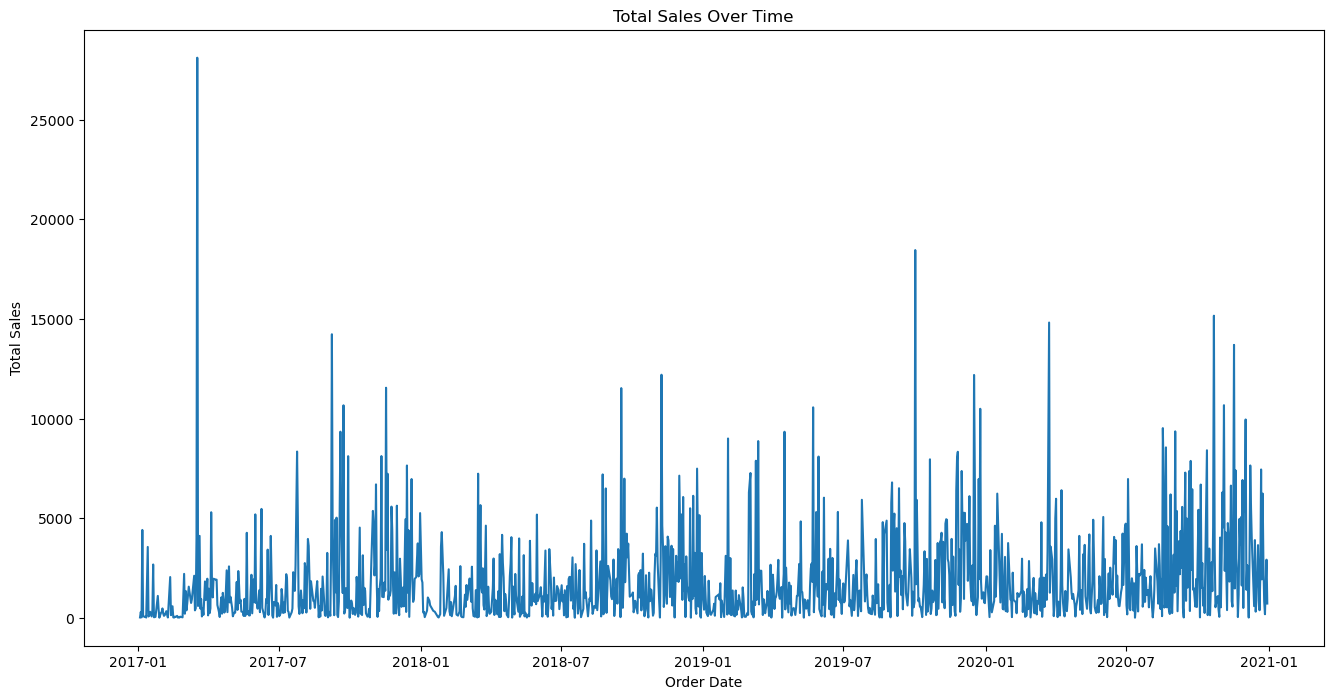

In [44]:
# Plotting a line chart for sales over time
plt.figure(figsize=(16,8))
plt.title("Total Sales Over Time")
sns.lineplot(x="order_date", y="sales", data=sales_over_time)
plt.xlabel("Order Date")
plt.ylabel("Total Sales")

## Total Profits Over Time

In [45]:
# Querying the data to get total profits for each day
profits_over_time = store_data.groupby("order_date")["profit"].sum().reset_index()
profits_over_time.head()

,order_date,profit
0,2017-01-03,5.55
1,2017-01-04,-65.99
2,2017-01-05,4.88
3,2017-01-06,1358.05
4,2017-01-07,-71.96


Text(0, 0.5, 'Total Profits')

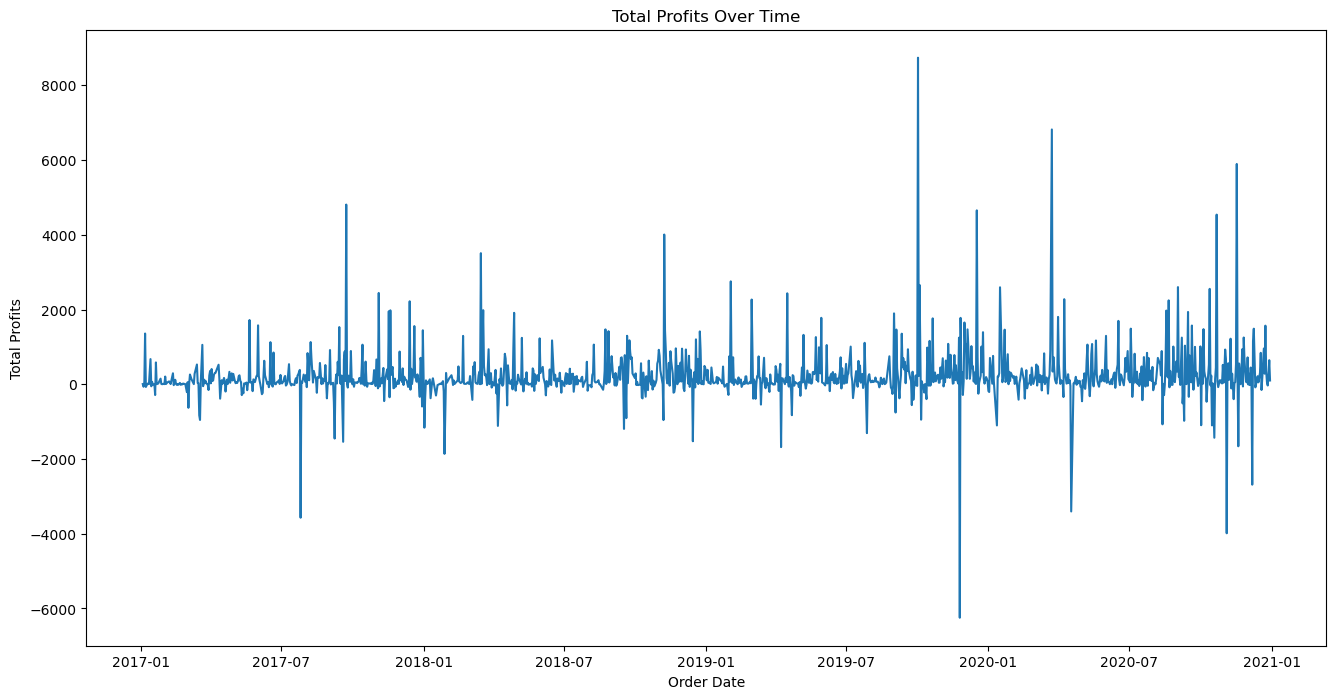

In [46]:
# Plotting a line chart showing profits over time
plt.figure(figsize=(16,8))
plt.title("Total Profits Over Time")
sns.lineplot(x="order_date", y="profit", data=profits_over_time)
plt.xlabel("Order Date")
plt.ylabel("Total Profits")

## Order count for each Ship Mode

In [47]:
# Extracting the order count for each ship mode
shipmode_order_count = store_data.groupby("ship_mode")["order_id"].nunique().reset_index(name="order_count")
shipmode_order_count

,ship_mode,order_count
0,First Class,787
1,Same Day,264
2,Second Class,964
3,Standard Class,2994


Text(0, 0.5, 'Order Count')

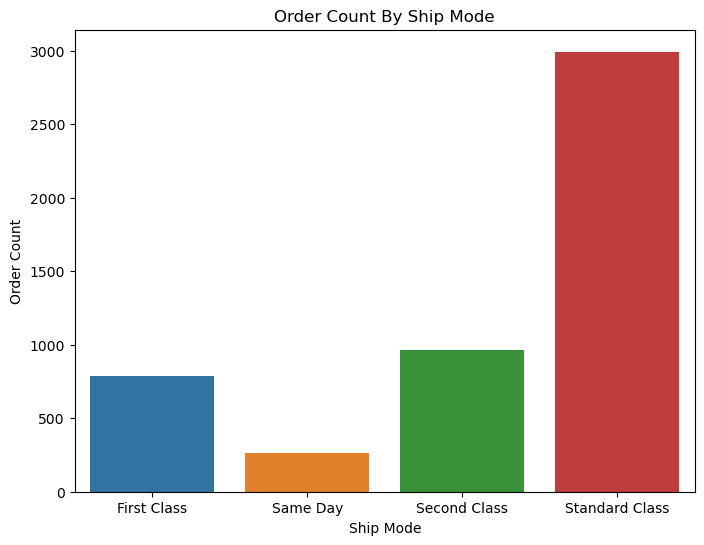

In [48]:
# Plotting a bar chart to show order count
plt.figure(figsize=(8,6))
sns.barplot(x="ship_mode", y="order_count", data=shipmode_order_count)
plt.title("Order Count By Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Order Count")

## Average Shipping Duration(wait time) for orders

In [49]:
# Querying for the average shipping duration for each mode
avg_duration = store_data.groupby("ship_mode")["shipping_duration(days)"].mean().reset_index()
avg_duration

,ship_mode,shipping_duration(days)
0,First Class,2.18
1,Same Day,0.04
2,Second Class,3.24
3,Standard Class,5.01


Text(0, 0.5, 'Average Shipping Duration')

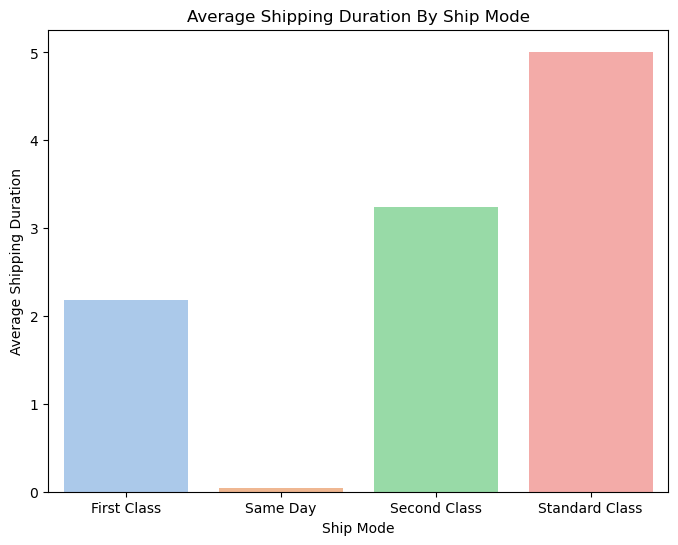

In [50]:
# Plotting a bar chart for the data
plt.figure(figsize=(8,6))
sns.barplot(x="ship_mode", y="shipping_duration(days)", data=avg_duration, palette='pastel')
plt.title("Average Shipping Duration By Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Average Shipping Duration")

## Top 10 Customers - Total Money Spent(Sales)

In [51]:
# Querying for the top 10 customers who spent the most money
customer_sales = store_data.groupby("customer_name")["sales"].sum().sort_values(ascending=False).reset_index()
top10 = customer_sales.head(10)
top10

,customer_name,sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


Text(0.5, 0, 'Total Sales')

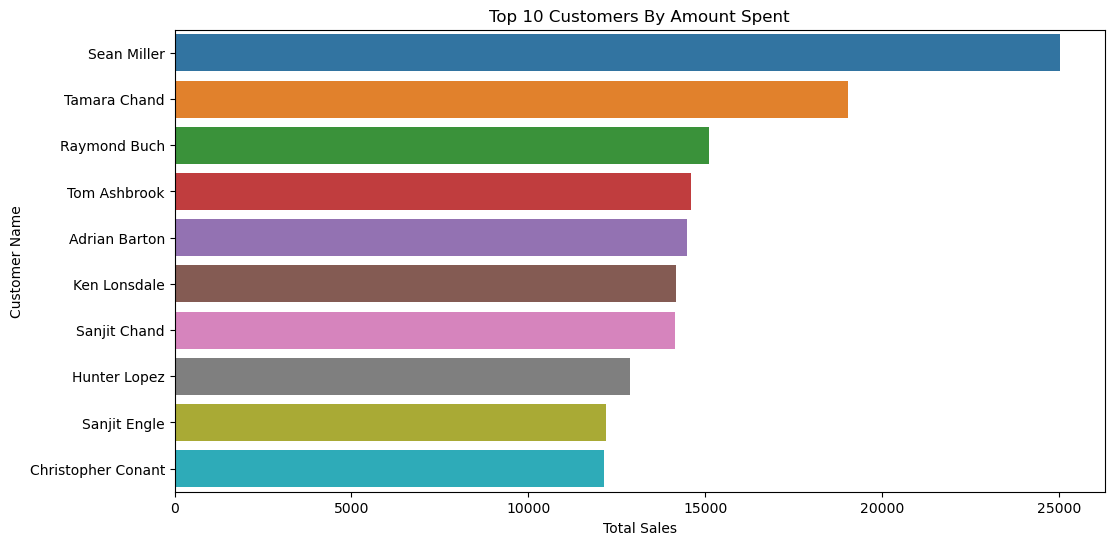

In [52]:
# Plotting a horizontal bar to display that data
plt.figure(figsize=(12,6))
sns.barplot(x="sales", y="customer_name", data=top10)
plt.title("Top 10 Customers By Amount Spent")
plt.ylabel("Customer Name")
plt.xlabel("Total Sales")
#plt.xticks(rotation=45, ha='right');

## Most Orders by Customers

In [53]:
# Extracting the customers with the most orders
customer_order_count = store_data.groupby("customer_name")["order_id"].nunique().sort_values(ascending=False).reset_index(name='order_count')
top_orders = customer_order_count.head(20)
top_orders

,customer_name,order_count
0,Emily Phan,17
1,Sally Hughsby,13
2,Erin Ashbrook,13
3,Patrick Gardner,13
4,Zuschuss Carroll,13
5,Chloris Kastensmidt,13
6,Joel Eaton,13
7,Noel Staavos,13
8,Rick Bensley,12
9,Resi Pölking,12


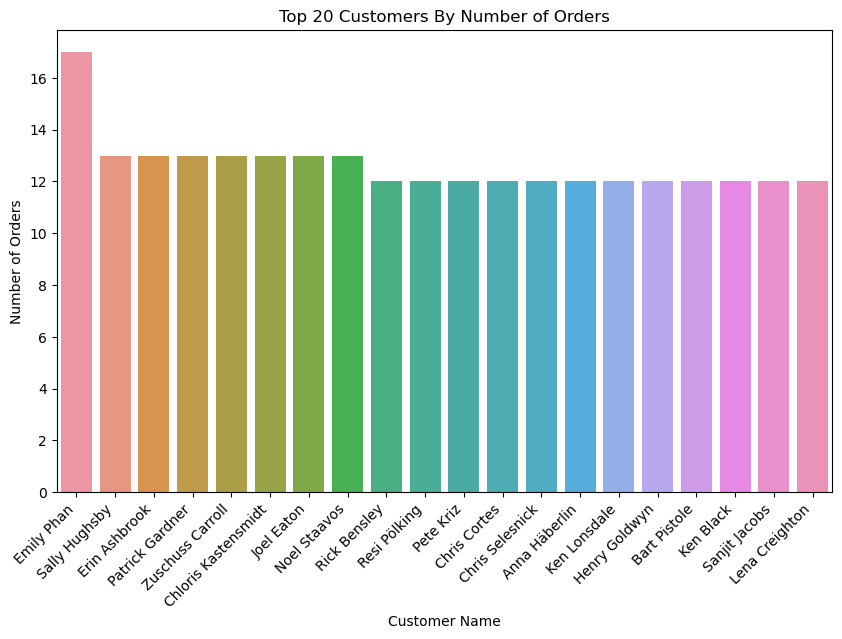

In [54]:
# Bar Chart showing the top 20 with the most orders
plt.figure(figsize=(10,6))
sns.barplot(x="customer_name", y="order_count", data=top_orders)
plt.title("Top 20 Customers By Number of Orders")
plt.xlabel("Customer Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right');

## Customers who ordered the most items(quantity)

In [55]:
# Querying for the total quantities of each customer
customer_quantity = store_data.groupby("customer_name")["quantity"].sum().sort_values(ascending=False).reset_index()
top_quantity = customer_quantity.head(10)
top_quantity

,customer_name,quantity
0,Jonathan Doherty,150
1,William Brown,146
2,John Lee,143
3,Paul Prost,138
4,Steven Cartwright,133
5,Emily Phan,124
6,Chloris Kastensmidt,122
7,Cassandra Brandow,122
8,Edward Hooks,120
9,Matt Abelman,117


Text(0.5, 0, 'Quantity Ordered')

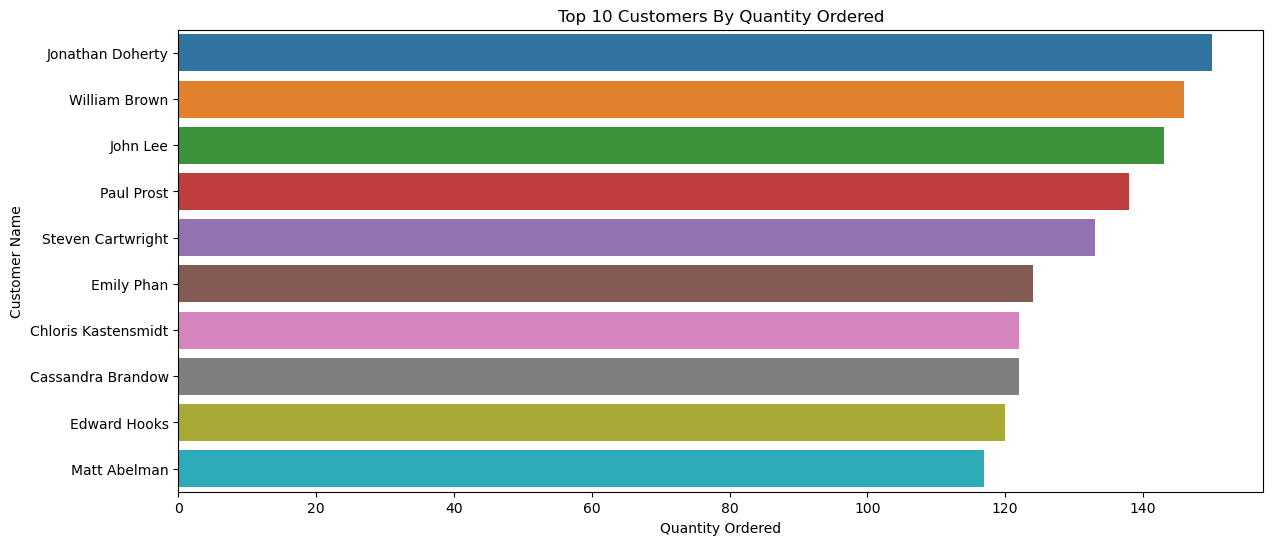

In [56]:
# Horizontal bar chart showing top 10 customers with most ordered items
plt.figure(figsize=(14,6))
sns.barplot(x="quantity", y="customer_name", data=top_quantity)
plt.title("Top 10 Customers By Quantity Ordered")
plt.ylabel("Customer Name")
plt.xlabel("Quantity Ordered")

## Total Sales By Segment

In [57]:
# Querying for the total sales for each segment
segment_sales = store_data.groupby("segment")["sales"].sum()
segment_sales

segment
Consumer      1161401.34
Corporate      706146.37
Home Office    429371.78
Name: sales, dtype: float64

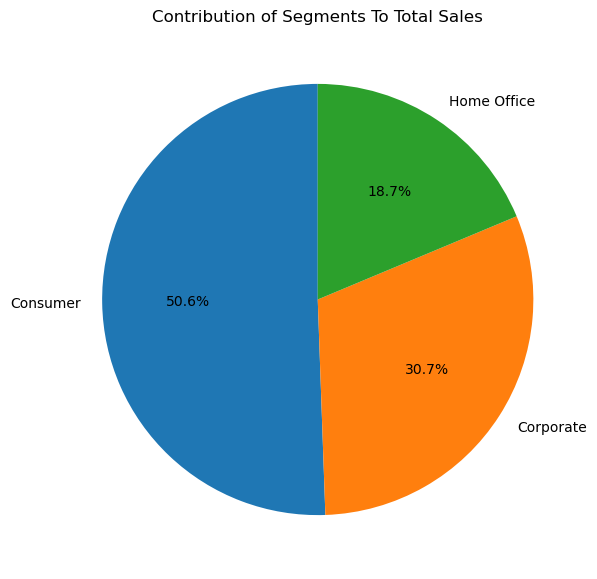

In [58]:
# Pie Chart Showing how much each Segment contributes to total sales generated
plt.figure(figsize=(7, 7))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Contribution of Segments To Total Sales');

## Segment Sales By Category

In [59]:
# Querying the data for total sales of each segment broken into categories
segment_cat_sales = store_data.groupby(["segment","category"])["sales"].sum().reset_index()
segment_cat_sales

,segment,category,sales
0,Consumer,Furniture,391049.31
1,Consumer,Office Supplies,363952.14
2,Consumer,Technology,406399.90
3,Corporate,Furniture,229019.79
4,Corporate,Office Supplies,230676.46
5,Corporate,Technology,246450.12
6,Home Office,Furniture,121649.33
7,Home Office,Office Supplies,124418.43
8,Home Office,Technology,183304.02


Text(0, 0.5, 'Total Sales')

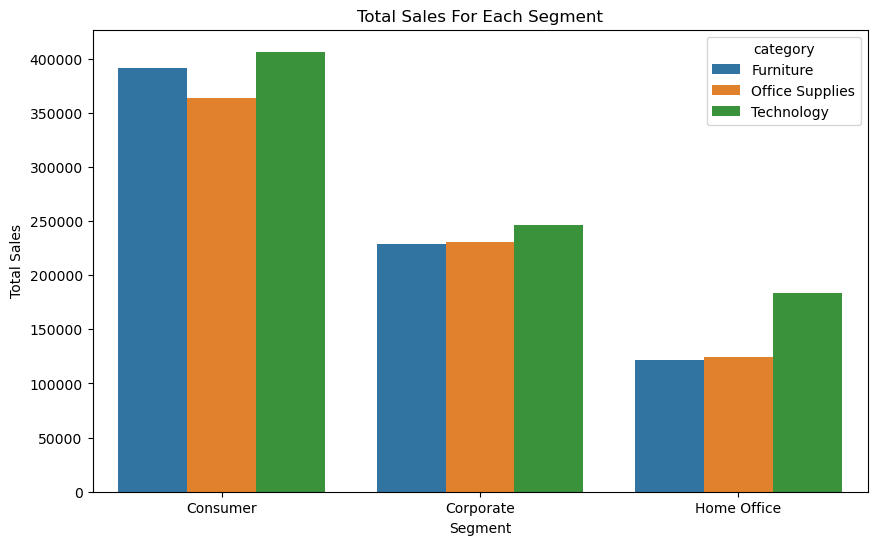

In [60]:
# Plotting a bar chart to display the data
plt.figure(figsize=(10,6))
sns.barplot(x="segment", y="sales", hue="category", data=segment_cat_sales)
plt.title("Total Sales For Each Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")

## Profits Generated By each segment

In [61]:
# Querying the data for total profits of each segmebt broken into categories
segment_cat_profits = store_data.groupby(["segment","category"])["profit"].sum().reset_index()
segment_cat_profits

,segment,category,profit
0,Consumer,Furniture,6991.08
1,Consumer,Office Supplies,56330.32
2,Consumer,Technology,70797.81
3,Corporate,Furniture,7584.82
4,Corporate,Office Supplies,40227.32
5,Corporate,Technology,44167.00
6,Home Office,Furniture,3887.44
7,Home Office,Office Supplies,25933.16
8,Home Office,Technology,30490.14


Text(0, 0.5, 'Total Profits')

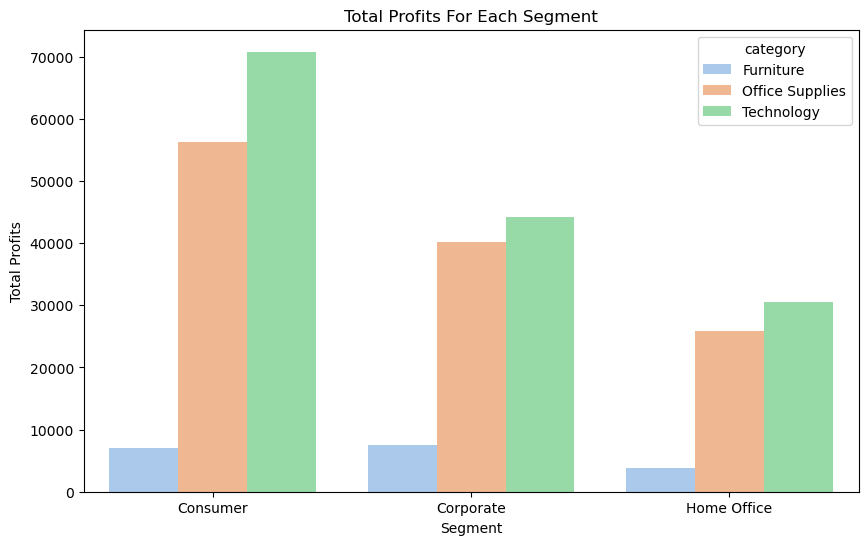

In [62]:
# Plotting a bar chart to display the data
plt.figure(figsize=(10,6))
sns.barplot(x="segment", y="profit", hue="category", data=segment_cat_profits, palette='pastel')
plt.title("Total Profits For Each Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profits")

## Total Sales For Each Category

In [63]:
# Querying for the total sales from each category
cat_sales = store_data.groupby("category")["sales"].sum().sort_values(ascending=False).reset_index()
cat_sales

,category,sales
0,Technology,836154.03
1,Furniture,741718.42
2,Office Supplies,719047.03


Text(0, 0.5, 'Category')

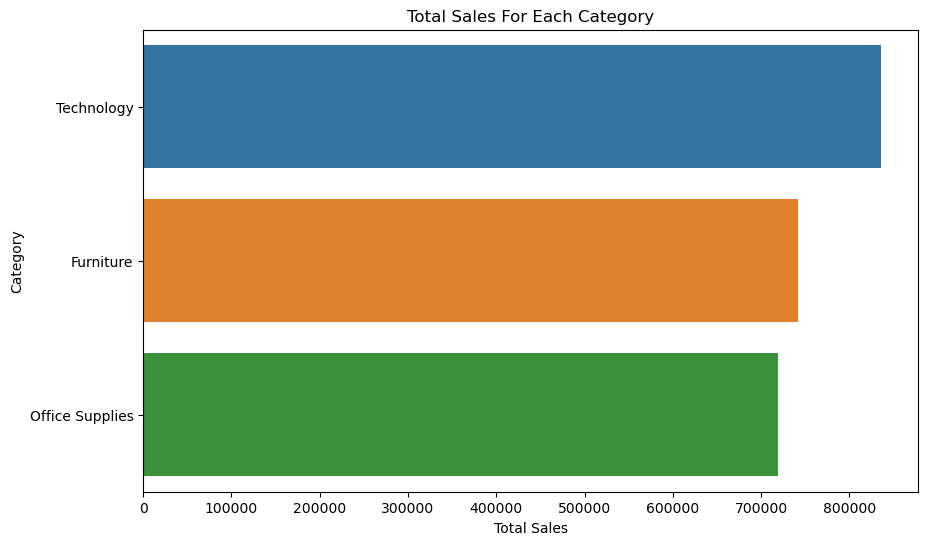

In [64]:
# Bar chart showing total sales for each category
plt.figure(figsize=(10,6))
sns.barplot(x="sales", y="category", data=cat_sales)
plt.title("Total Sales For Each Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")

## Total Profits For each Category

In [65]:
# Querying for the total profits from each category
cat_profits = store_data.groupby("category")["profit"].sum().sort_values(ascending=False).reset_index()
cat_profits

,category,profit
0,Technology,145454.95
1,Office Supplies,122490.80
2,Furniture,18463.33


Text(0, 0.5, 'Total Profits')

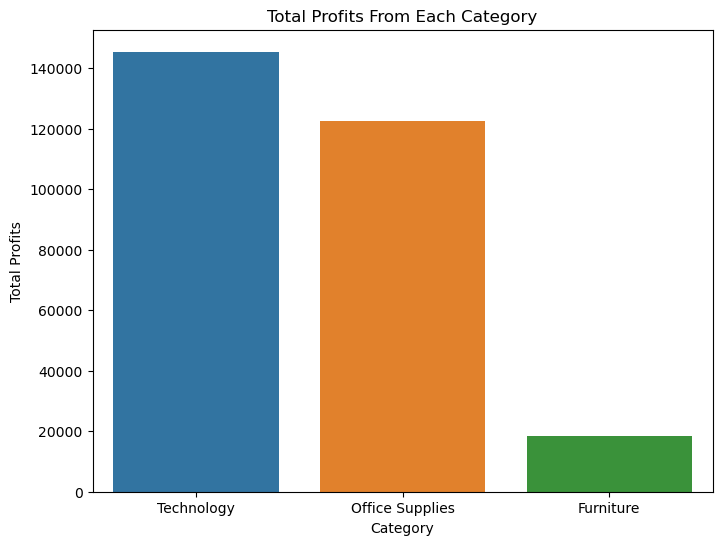

In [66]:
# Bar chart showing total profits for each category
plt.figure(figsize=(8,6))
sns.barplot(x="category", y="profit", data=cat_profits)
plt.title("Total Profits From Each Category")
plt.xlabel("Category")
plt.ylabel("Total Profits")

## Total Quantities for Each Category

In [67]:
# Querying for the total quantities ordered of each category
cat_quantity = store_data.groupby("category")["quantity"].sum().sort_values(ascending=False).reset_index()
cat_quantity

,category,quantity
0,Office Supplies,22906
1,Furniture,8026
2,Technology,6939


Text(0, 0.5, 'Total Quantities')

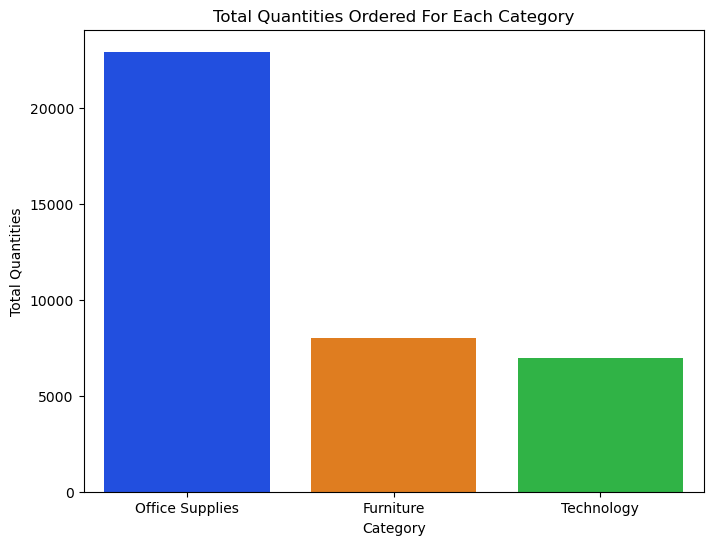

In [68]:
# Bar chart showing total quantities ordered for each category
plt.figure(figsize=(8,6))
sns.barplot(x="category", y="quantity", data=cat_quantity, palette='bright')
plt.title("Total Quantities Ordered For Each Category")
plt.xlabel("Category")
plt.ylabel("Total Quantities")

## Total Sales for each Subcategory

In [69]:
# Querying for the total sales from each subcategory
subcat_sales = store_data.groupby("sub_category")["sales"].sum().reset_index()
subcat_sales

,sub_category,sales
0,Accessories,167380.32
1,Appliances,107532.16
2,Art,27118.79
3,Binders,203412.73
4,Bookcases,114880.00
5,Chairs,328167.73
6,Copiers,149528.03
7,Envelopes,16476.40
8,Fasteners,3024.28
9,Furnishings,91705.16


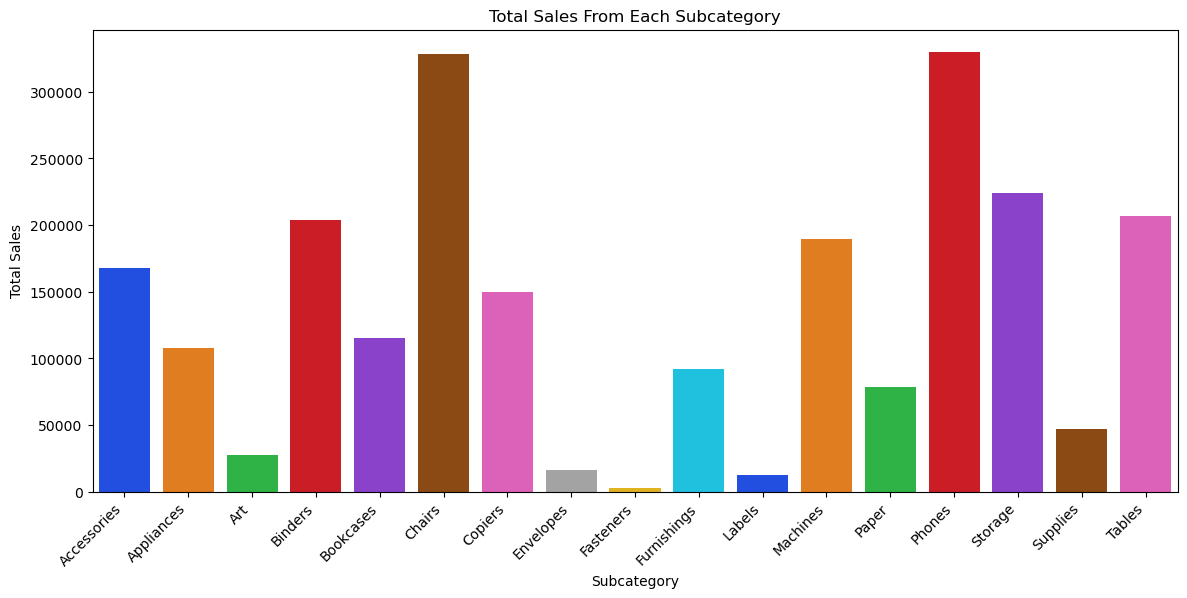

In [70]:
# Bar chart to display the data
plt.figure(figsize=(14,6))
sns.barplot(x="sub_category", y="sales", data=subcat_sales, palette='bright')
plt.title("Total Sales From Each Subcategory")
plt.xlabel("Subcategory")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right');

## Total Profits for each Subcategory

In [71]:
# Querying for the total profits from each subcategory
subcat_profits = store_data.groupby("sub_category")["profit"].sum().reset_index()
subcat_profits

,sub_category,profit
0,Accessories,41936.64
1,Appliances,18138.01
2,Art,6527.79
3,Binders,30221.76
4,Bookcases,-3472.56
5,Chairs,26602.23
6,Copiers,55617.82
7,Envelopes,6964.18
8,Fasteners,949.52
9,Furnishings,13059.14


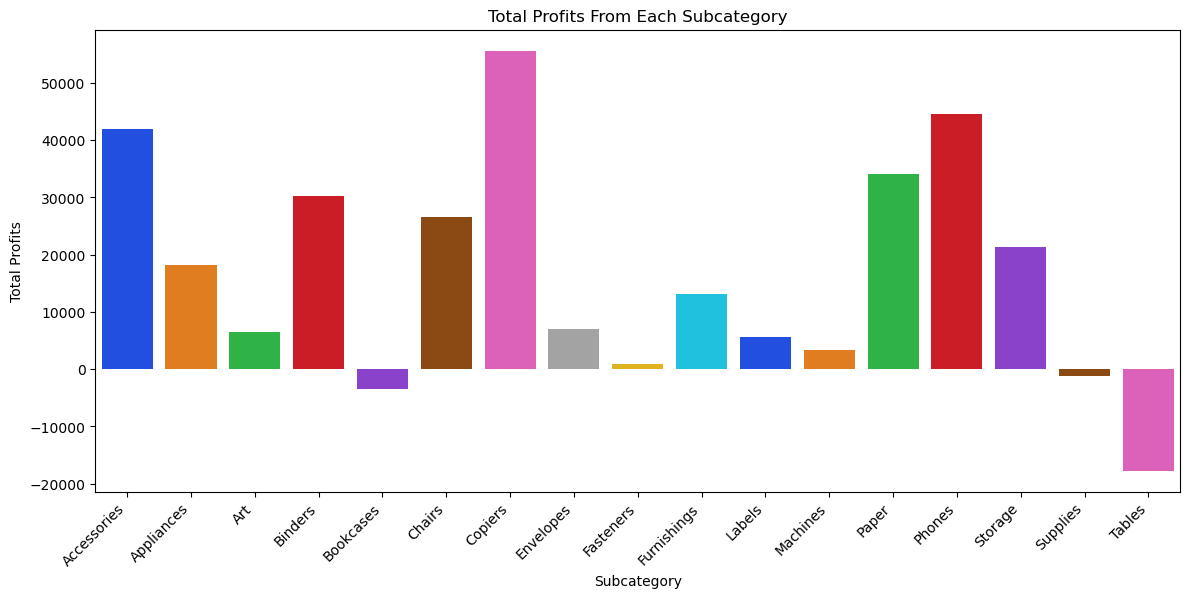

In [72]:
# Bar Chart to show the profits
plt.figure(figsize=(14,6))
sns.barplot(x="sub_category", y="profit", data=subcat_profits, palette='bright')
plt.title("Total Profits From Each Subcategory")
plt.xlabel("Subcategory")
plt.ylabel("Total Profits")
plt.xticks(rotation=45, ha='right');

## Total Quantities Of Each Subcategory ordered

In [73]:
# Querying for the total Quantities Of Each Subcategory ordered
subcat_quantity = store_data.groupby("sub_category")["quantity"].sum().reset_index()
subcat_quantity

,sub_category,quantity
0,Accessories,2976
1,Appliances,1729
2,Art,3000
3,Binders,5974
4,Bookcases,868
5,Chairs,2354
6,Copiers,234
7,Envelopes,906
8,Fasteners,914
9,Furnishings,3563


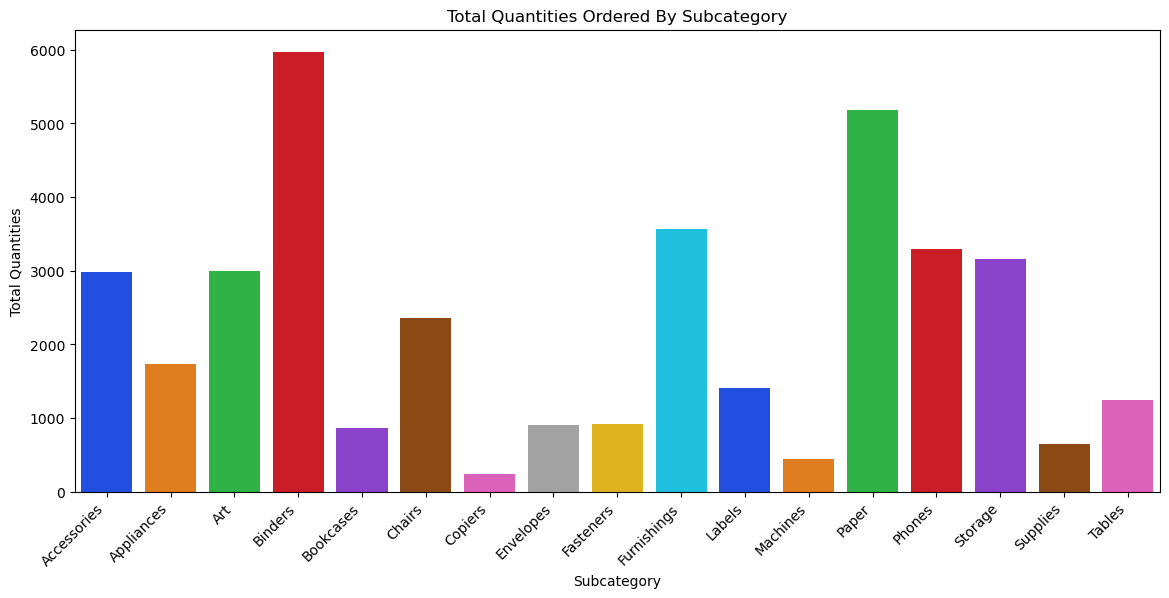

In [74]:
# Bar Chart showing the quantities ordered
plt.figure(figsize=(14,6))
sns.barplot(x="sub_category", y="quantity", data=subcat_quantity, palette='bright')
plt.title("Total Quantities Ordered By Subcategory")
plt.xlabel("Subcategory")
plt.ylabel("Total Quantities")
plt.xticks(rotation=45, ha='right');

<AxesSubplot:xlabel='sales', ylabel='profit'>

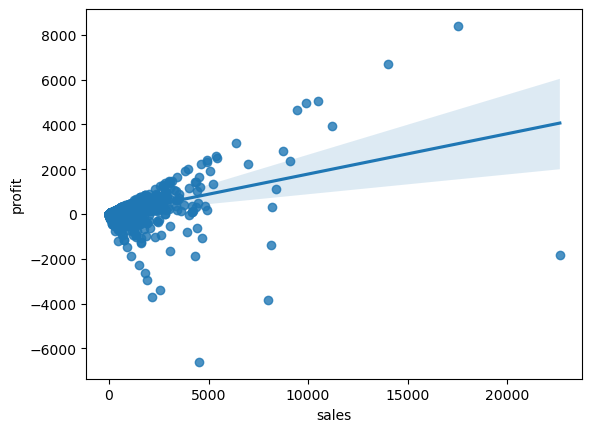

In [75]:
sns.regplot(x=store_data["sales"], y=store_data["profit"])

## Total Sales From Each Region

In [76]:
# Querying for the sales generated from each region
region_sales = store_data.groupby("region")["sales"].sum().sort_values(ascending=False).reset_index()
region_sales

,region,sales
0,West,725457.82
1,East,678499.87
2,Central,501239.89
3,South,391721.91


Text(0, 0.5, 'Region')

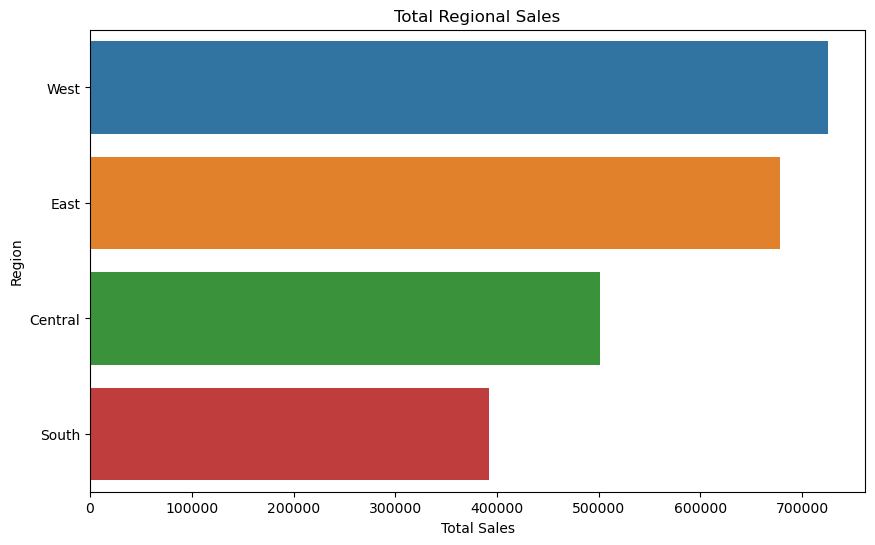

In [77]:
# Horizontal bar chart displaying the data
plt.figure(figsize=(10,6))
sns.barplot(y="region", x="sales", data=region_sales)
plt.title("Total Regional Sales")
plt.xlabel("Total Sales")
plt.ylabel("Region")

## Total Profits From Each Region

In [78]:
# Querying for the profits generated from each region
region_profits = store_data.groupby("region")["profit"].sum().sort_values(ascending=False).reset_index()
region_profits

,region,profit
0,West,108418.45
1,East,91534.84
2,South,46749.43
3,Central,39706.36


Text(0, 0.5, 'Region')

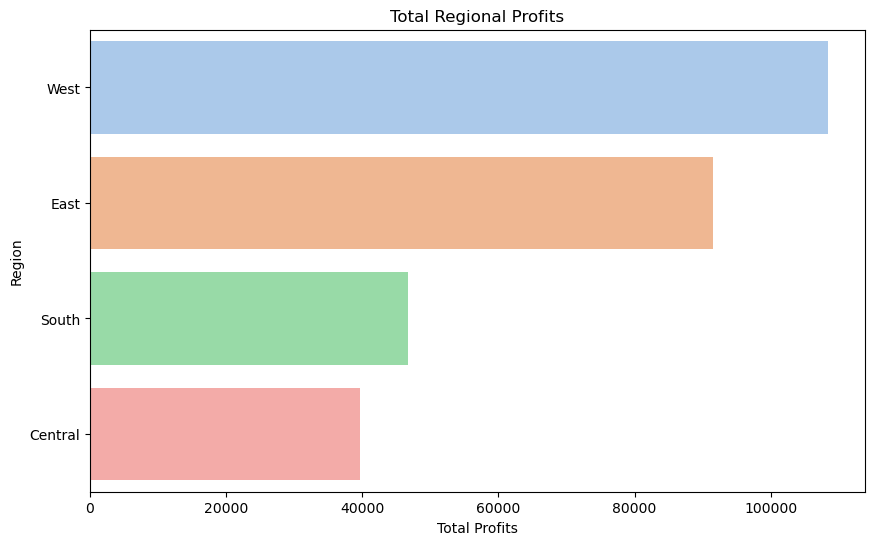

In [79]:
# Horizontal bar chart displaying the data
plt.figure(figsize=(10,6))
sns.barplot(y="region", x="profit", data=region_profits, palette='pastel')
plt.title("Total Regional Profits")
plt.xlabel("Total Profits")
plt.ylabel("Region")

## Total Quantities Ordered For Each Region

In [80]:
# Querying for the total quantities ordered
region_quantity = store_data.groupby("region")["quantity"].sum().sort_values(ascending=False).reset_index()
region_quantity

,region,quantity
0,West,12266
1,East,10616
2,Central,8780
3,South,6209


Text(0, 0.5, 'Total Quantities')

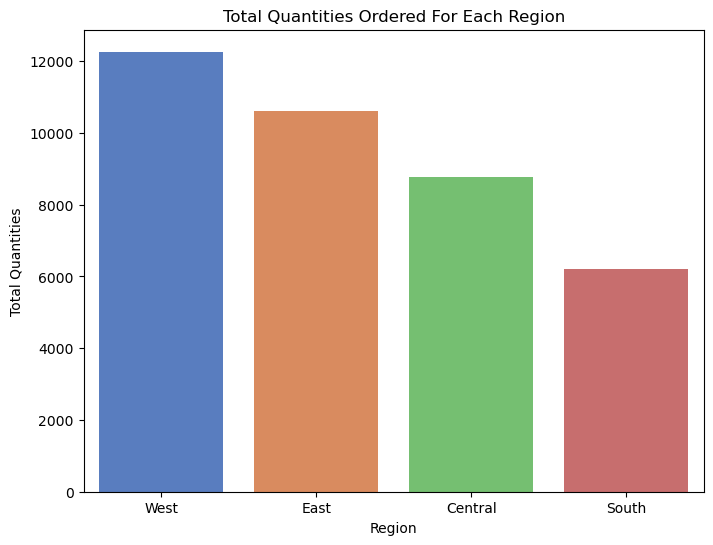

In [81]:
# Bar chart displaying the data
plt.figure(figsize=(8,6))
sns.barplot(y="quantity", x="region", data=region_quantity, palette='muted')
plt.title("Total Quantities Ordered For Each Region")
plt.xlabel("Region")
plt.ylabel("Total Quantities")

## Total Sales For Each State

In [82]:
# Querying for the sales for each state
state_sales = store_data.groupby("state")["sales"].sum().sort_values(ascending=False).reset_index()
state_sales

,state,sales
0,California,457687.63
1,New York,310876.27
2,Texas,170188.05
3,Washington,138641.27
4,Pennsylvania,116511.91
5,Florida,89473.71
6,Illinois,80166.10
7,Ohio,77976.76
8,Michigan,76269.61
9,Virginia,70636.72


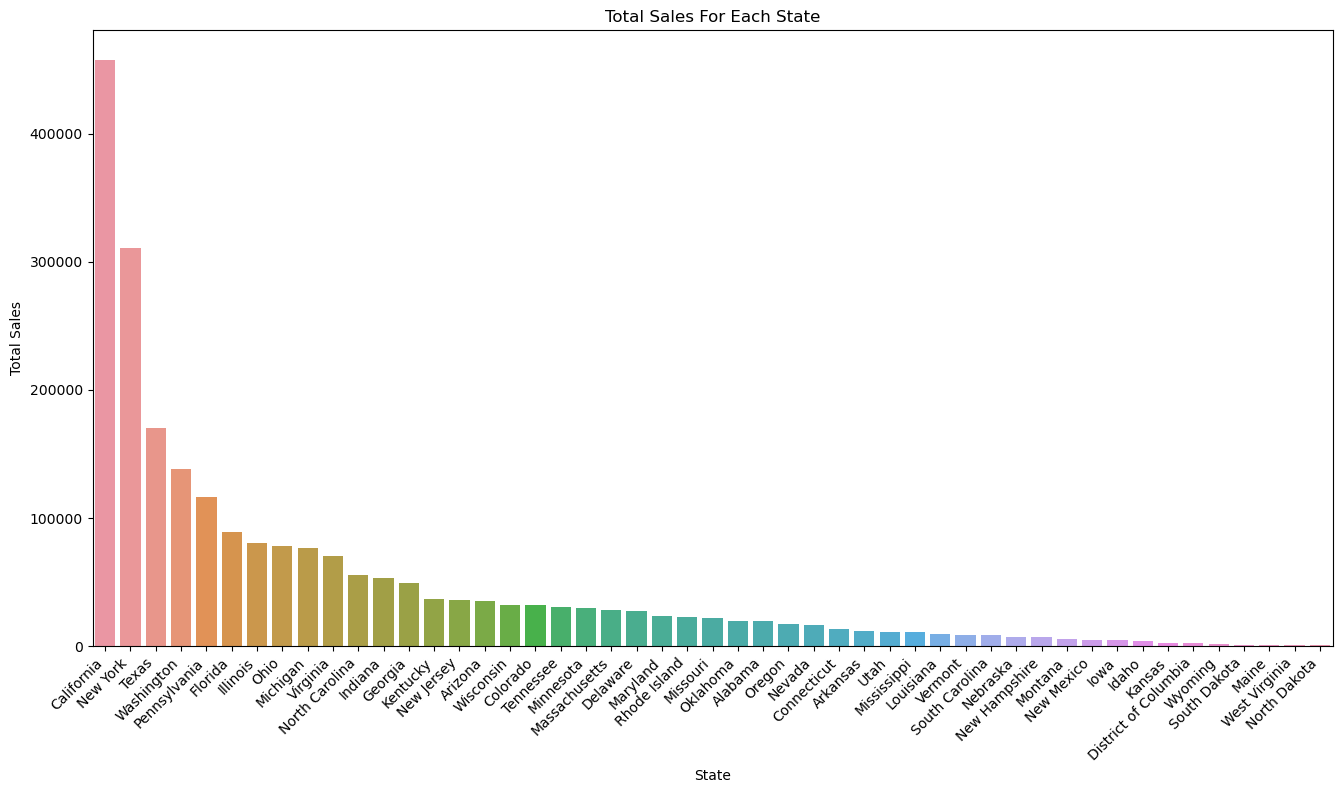

In [83]:
# Bar chart displaying the data
plt.figure(figsize=(16,8))
sns.barplot(y="sales", x="state", data=state_sales)
plt.title("Total Sales For Each State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right');

## Total Profits From Each State

In [84]:
# Querying for the profits earned from each state
state_profits = store_data.groupby("state")["profit"].sum().sort_values(ascending=False).reset_index()
state_profits

,state,profit
0,California,76381.39
1,New York,74038.55
2,Washington,33402.65
3,Michigan,24463.19
4,Virginia,18597.95
5,Indiana,18382.94
6,Georgia,16250.04
7,Kentucky,11199.70
8,Minnesota,10823.19
9,Delaware,9977.37


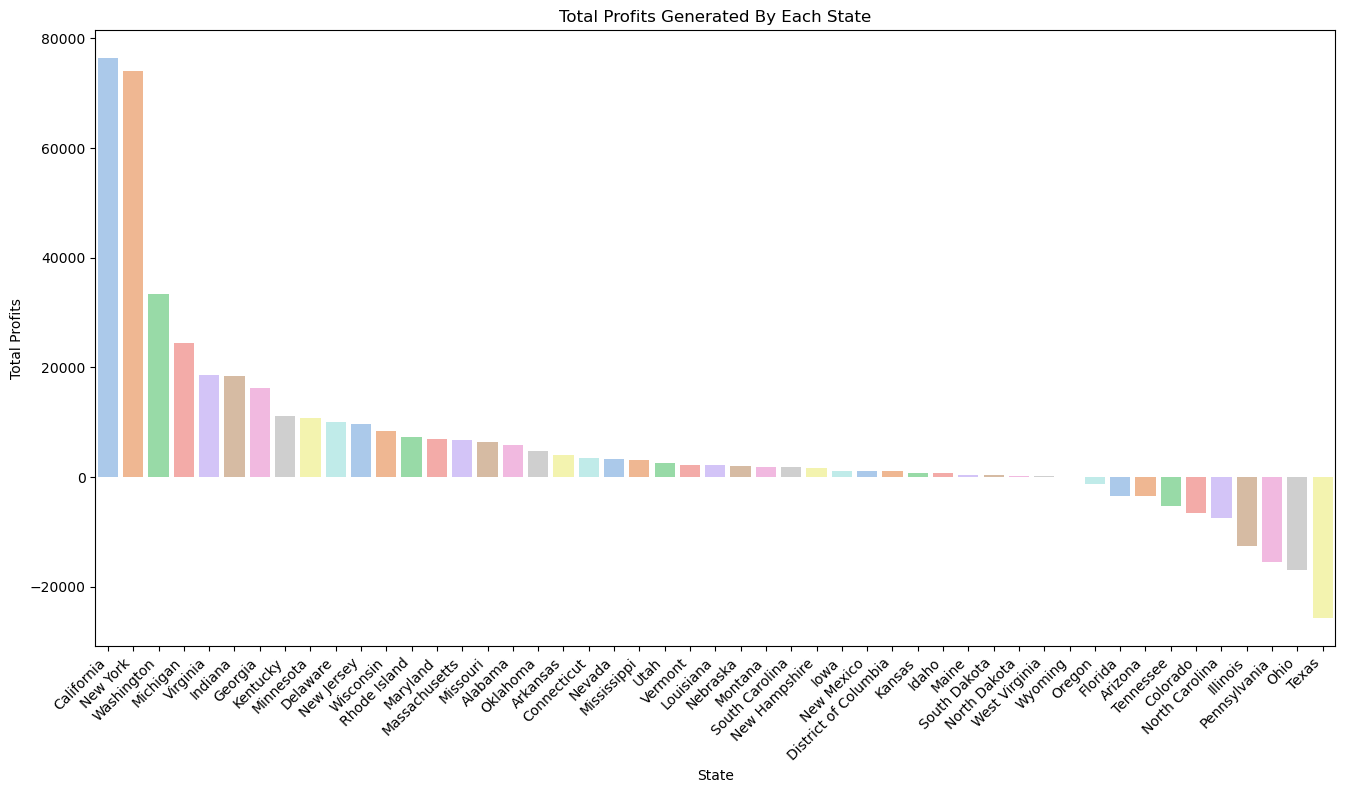

In [85]:
# Bar chart displaying the data
plt.figure(figsize=(16,8))
sns.barplot(x="state",y="profit", data=state_profits, palette='pastel')
plt.title("Total Profits Generated By Each State")
plt.xlabel("State")
plt.ylabel("Total Profits")
plt.xticks(rotation=45, ha='right');

## Total Quantities Ordered By Each State

In [86]:
# Querying for the total quantities from each state
state_quantity = store_data.groupby("state")["quantity"].sum().sort_values(ascending=False).reset_index()
state_quantity

,state,quantity
0,California,7667
1,New York,4224
2,Texas,3724
3,Pennsylvania,2153
4,Washington,1883
5,Illinois,1845
6,Ohio,1757
7,Florida,1379
8,North Carolina,983
9,Michigan,946


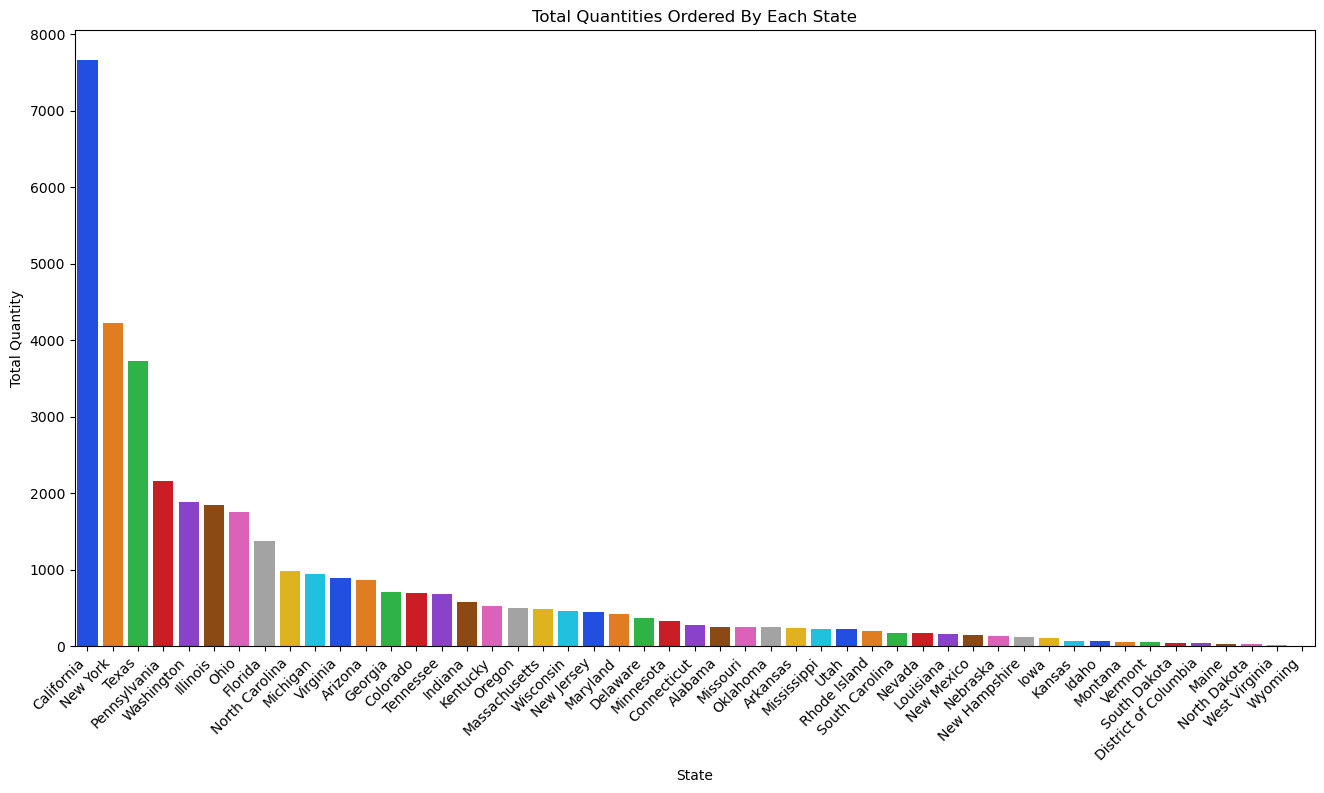

In [87]:
# Bar chart displaying the data
plt.figure(figsize=(16,8))
sns.barplot(x="state", y="quantity", data=state_quantity, palette='bright')
plt.title("Total Quantities Ordered By Each State")
plt.xlabel("State")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha='right');

## Total Sales By State But Grouped By Their Respective Regions

In [88]:
region_hue_sales = store_data.groupby(["region", "state"])["sales"].sum().reset_index()
region_hue_sales

,region,state,sales
0,Central,Illinois,80166.10
1,Central,Indiana,53555.36
2,Central,Iowa,4579.76
3,Central,Kansas,2914.31
4,Central,Michigan,76269.61
5,Central,Minnesota,29863.15
6,Central,Missouri,22205.15
7,Central,Nebraska,7464.93
8,Central,North Dakota,919.91
9,Central,Oklahoma,19683.39


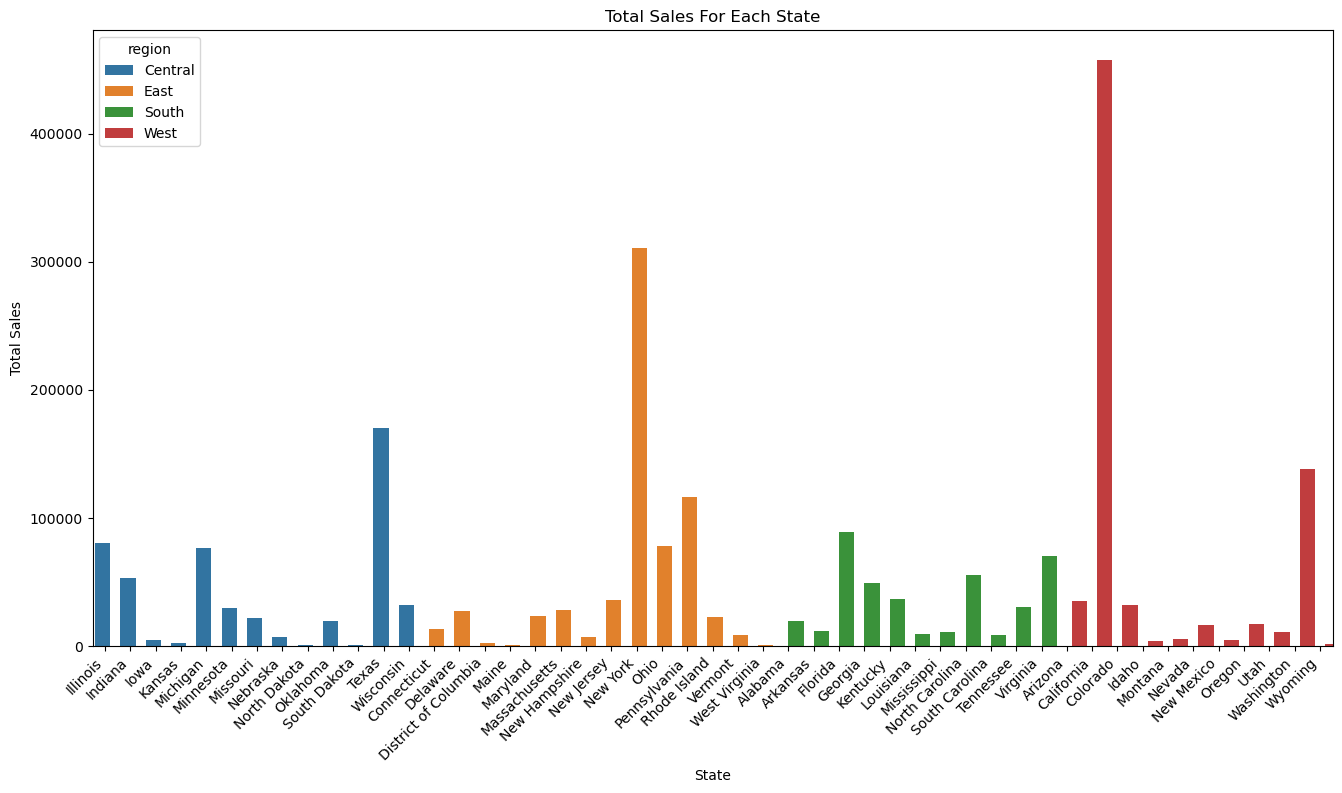

In [89]:
# Bar Chart to display the data
plt.figure(figsize=(16,8))
sns.barplot(x="state", y="sales", data=region_hue_sales, hue="region")

# Access the underlying Matplotlib Axes
ax = plt.gca()

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(0.6)  # Adjust the width as needed
    
plt.title("Total Sales For Each State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right');

## Total Profits Generated From Each State But Grouped By Their Respective Regions

In [90]:
region_hue_profits = store_data.groupby(["region", "state"])["profit"].sum().reset_index()
region_hue_profits

,region,state,profit
0,Central,Illinois,-12607.89
1,Central,Indiana,18382.94
2,Central,Iowa,1183.81
3,Central,Kansas,836.44
4,Central,Michigan,24463.19
5,Central,Minnesota,10823.19
6,Central,Missouri,6436.21
7,Central,Nebraska,2037.09
8,Central,North Dakota,230.15
9,Central,Oklahoma,4853.96


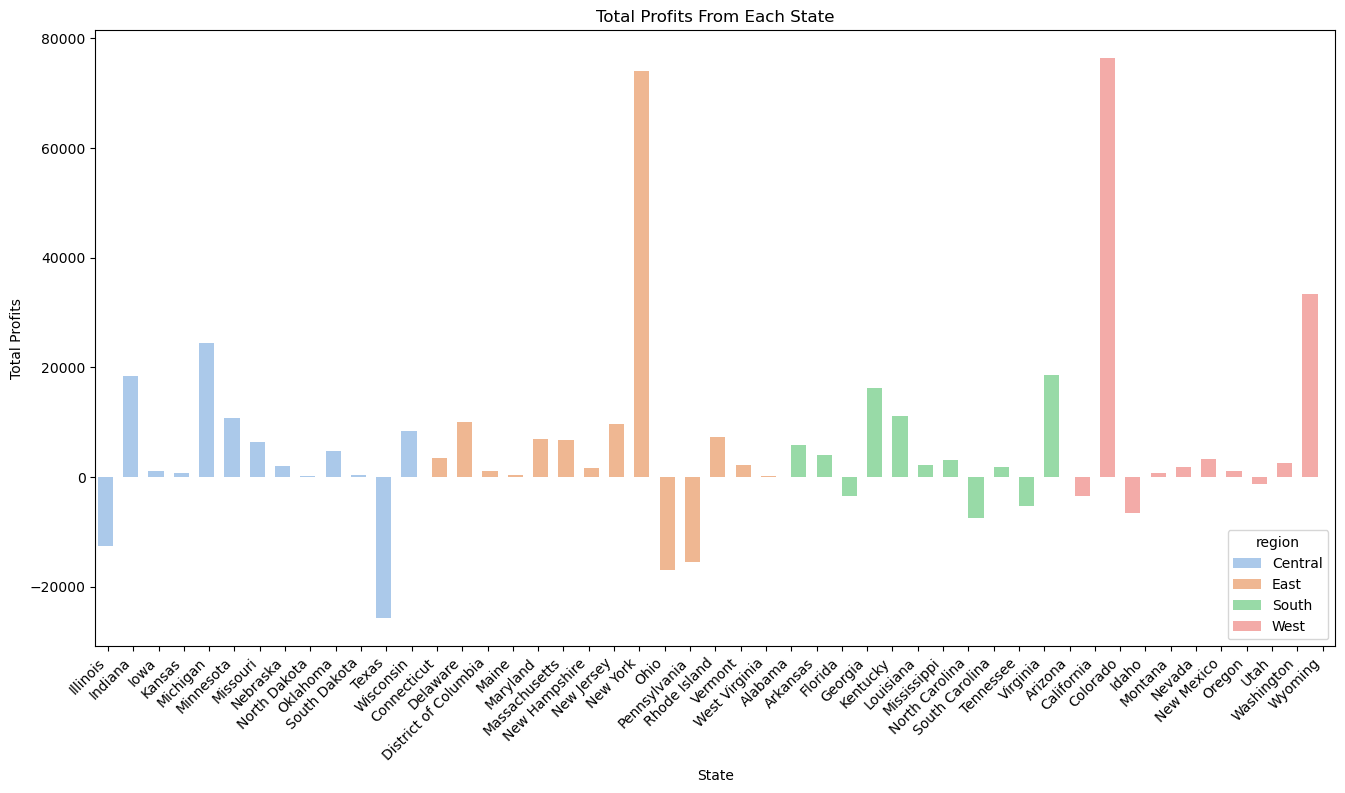

In [91]:
# Bar chart to display the data
plt.figure(figsize=(16,8))
sns.barplot(x="state", y="profit", data=region_hue_profits, hue="region", palette='pastel')

# Access the underlying Matplotlib Axes
ax = plt.gca()

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(0.6)  # Adjust the width as needed
    
plt.title("Total Profits From Each State")
plt.xlabel("State")
plt.ylabel("Total Profits")
plt.xticks(rotation=45, ha='right');

## Best Selling Products

In [92]:
# Querying the data to get the top 10 best selling products
product_sales = store_data.groupby("product_name")["sales"].sum().sort_values(ascending=False).reset_index()
prodsales_top10 = product_sales.head(10)
prodsales_top10

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


Text(0, 0.5, 'Product Name')

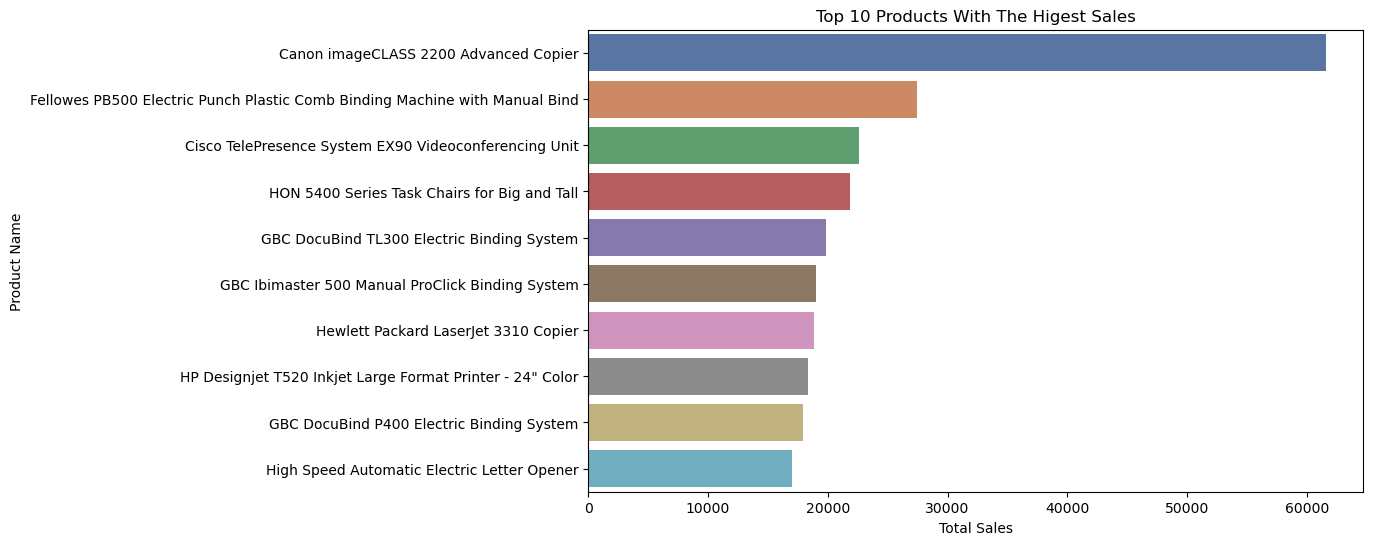

In [93]:
# Plotting a horizontal bar chart to display the data
plt.figure(figsize=(10,6))
sns.barplot(x="sales", y="product_name", data=prodsales_top10, palette='deep')
plt.title("Top 10 Products With The Higest Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")

## Products Generating the most Profit

In [94]:
# Querying the data to get the top 10 products generating the most profits
product_profits = store_data.groupby("product_name")["profit"].sum().sort_values(ascending=False).reset_index()
prodprofits_top10 = product_profits.head(10)
prodprofits_top10

,product_name,profit
0,Canon imageCLASS 2200 Advanced Copier,25199.93
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04
2,Hewlett Packard LaserJet 3310 Copier,6983.88
3,Canon PC1060 Personal Laser Copier,4570.93
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98
5,Ativa V4110MDD Micro-Cut Shredder,3772.95
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.97
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.28
8,Ibico EPK-21 Electric Binding System,3345.28
9,Zebra ZM400 Thermal Label Printer,3343.54


Text(0, 0.5, 'Product Name')

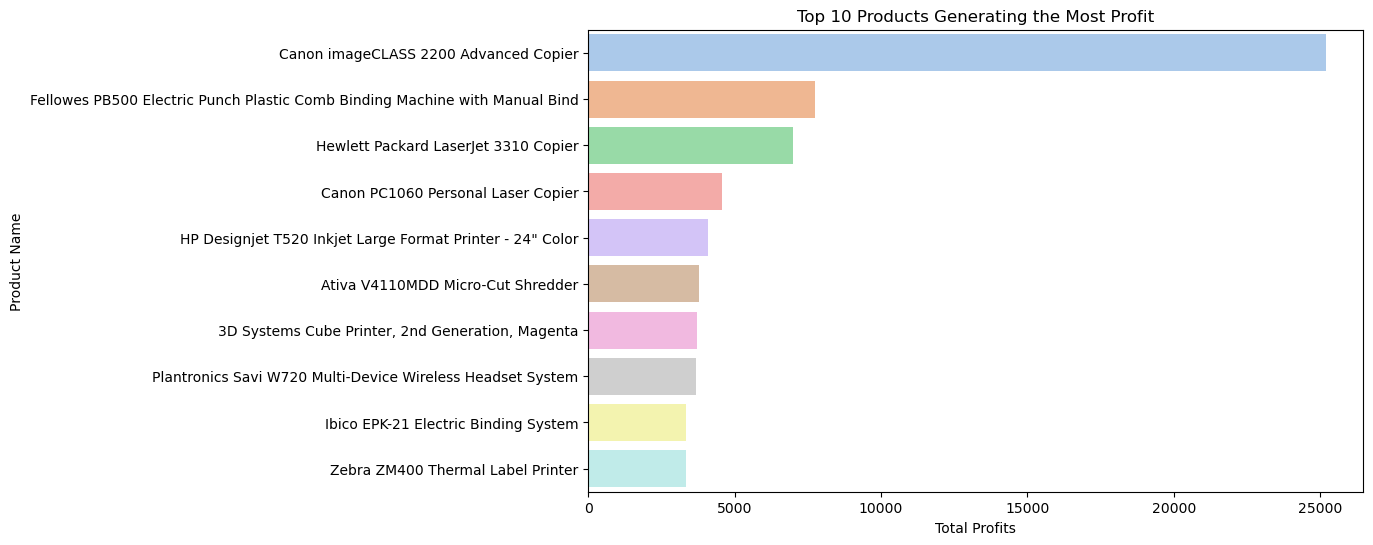

In [95]:
# Plotting a horizontal bar chart to display the data
plt.figure(figsize=(10,6))
sns.barplot(x="profit", y="product_name", data=prodprofits_top10, palette='pastel')
plt.title("Top 10 Products Generating the Most Profit")
plt.xlabel("Total Profits")
plt.ylabel("Product Name")

## Most Ordered Products

In [96]:
# Querying the data to get the top 10 most ordered products
product_quantity = store_data.groupby("product_name")["quantity"].sum().sort_values(ascending=False).reset_index()
prodquantity_top10 = product_quantity.head(10)
prodquantity_top10

,product_name,quantity
0,Staples,215
1,Staple envelope,170
2,Easy-staple paper,150
3,Staples in misc. colors,86
4,KI Adjustable-Height Table,74
5,Storex Dura Pro Binders,71
6,Avery Non-Stick Binders,71
7,GBC Premium Transparent Covers with Diagonal L...,67
8,"Situations Contoured Folding Chairs, 4/Set",64
9,Staple-based wall hangings,62


Text(0, 0.5, 'Product Name')

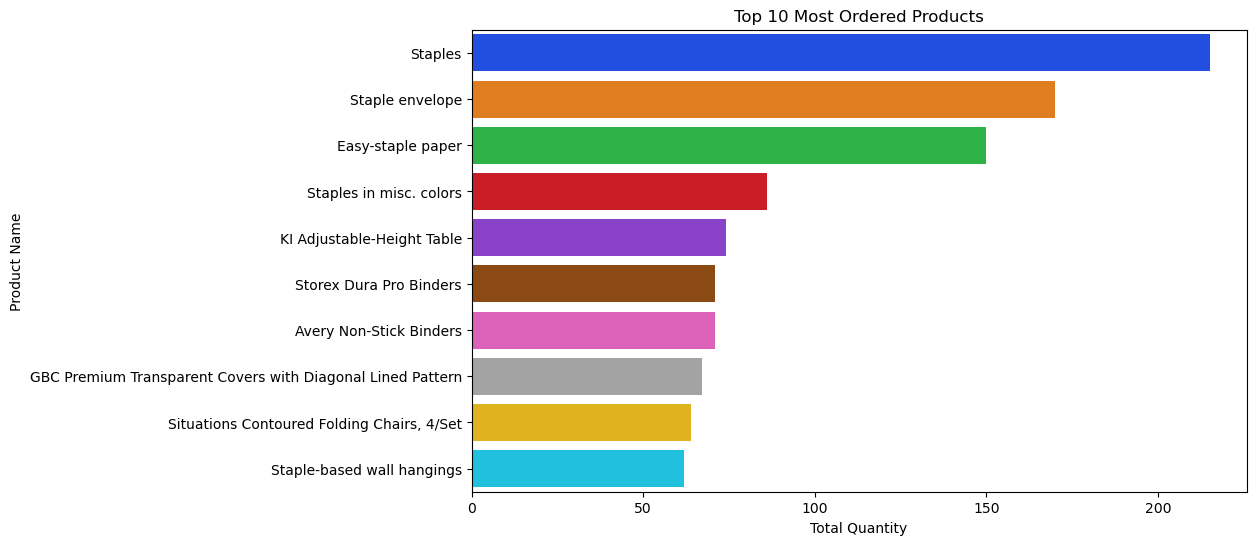

In [97]:
# Plotting a horizontal bar chart to display the data
plt.figure(figsize=(10,6))
sns.barplot(x="quantity", y="product_name", data=prodquantity_top10, palette='bright')
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Total Quantity")
plt.ylabel("Product Name")

## Discount Impact on Sales & Profits

In [98]:
discounted_sales = store_data.groupby("discounted")["sales"].sum().reset_index()
discounted_sales

,discounted,sales
0,No,1087908.47
1,Yes,1209011.02


Text(0, 0.5, 'Total Sales')

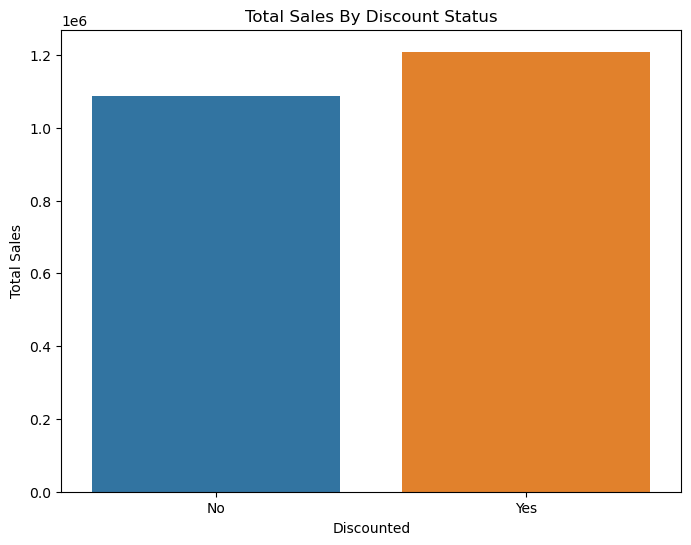

In [99]:
# Plotting a bar chart to display the data
plt.figure(figsize=(8,6))
sns.barplot(x="discounted", y="sales", data=discounted_sales)
plt.title("Total Sales By Discount Status")
plt.xlabel("Discounted")
plt.ylabel("Total Sales")

In [100]:
discounted_profits = store_data.groupby("discounted")["profit"].sum().reset_index()
discounted_profits

,discounted,profit
0,No,320987.60
1,Yes,-34578.52


Text(0, 0.5, 'Total Profits')

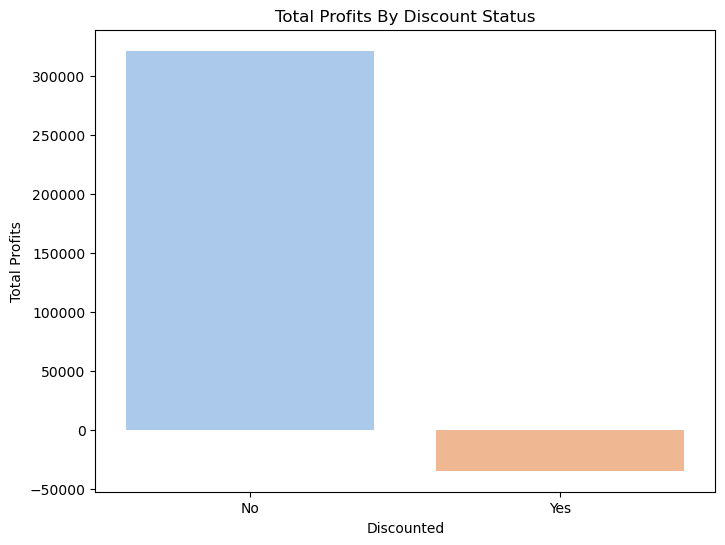

In [101]:
# Plotting a bar chart to display the data
plt.figure(figsize=(8,6))
sns.barplot(x="discounted", y="profit", data=discounted_profits, palette='pastel')
plt.title("Total Profits By Discount Status")
plt.xlabel("Discounted")
plt.ylabel("Total Profits")